<font size="10">Fresh Produce Freshness Detection Using Machine Learning</font>

<font size="7">Problem Statement:</font>

<font size="4">
Maintaining the freshness of produce is a significant challenge in the retail and supply chain industries. Visual inspection methods are subjective and inconsistent, leading to wastage and quality issues. Our solution leverages machine learning to objectively assess the freshness of produce through image analysis.</font>

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

<font size="4">1. Data Collection & Preprocessing</font>

This script assumes you have a dataset of produce images categorized by freshness levels.

In [2]:
# Define the path to your dataset
data_path = r"C:\Users\91901\Downloads\archive (1)\Fruits_Vegetables_Dataset(12000)\Vegetables"
categories = os.listdir(data_path)

In [3]:
# Prepare data
data = []
labels = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    label = categories.index(category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (128, 128))
        data.append(image)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

<font size="4">2. Model Creation</font>

The Convolutional Neural Network (CNN) model for image classification.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
# Model Initialization
model = Sequential()

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

# Add Input layer first
model.add(Input(shape=(128, 128, 3)))

# Add the rest of the layers
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(categories), activation='softmax'))

In [9]:
# Compiling the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,518,602 (24.87 MB)

 Trainable params: 6,518,602 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

<font size="4">3. Model Training</font>

Training the CNN model with the prepared dataset.

In [50]:
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 148s 902ms/step - accuracy: 0.1415 - loss: 27.9628 - val_accuracy: 0.0974 - val_loss: 2.3007
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 132s 858ms/step - accuracy: 0.1061 - loss: 2.2979 - val_accuracy: 0.1490 - val_loss: 2.1876
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 130s 846ms/step - accuracy: 0.1685 - loss: 2.2257 - val_accuracy: 0.2048 - val_loss: 2.0846
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 128s 828ms/step - accuracy: 0.1746 - loss: 2.1947 - val_accuracy: 0.1915 - val_loss: 2.1607
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 136s 884ms/step - accuracy: 0.1422 - loss: 2.2478 - val_accuracy: 0.1690 - val_loss: 2.1532
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 562s 4s/step - accuracy: 0.1595 - loss: 2.1968 - val_accuracy: 0.2132 - val_loss: 2.1260
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 154s 996ms/step - accuracy: 0.1633 - loss: 2.2117 - val_accuracy: 0.1940 - val_loss: 2.1069
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 133s 863ms/step - accuracy: 0.1698 - l

In [53]:
# Saving the Model
model.save('freshness_detection_model.keras')

<font size="4">4. Model Prediction and Freshness Index Calculation</font>

Loading the model and predicting the freshness of a new image.

In [58]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

In [60]:
from keras.models import load_model
from keras.optimizers import Adam

# Load the model
model = load_model('freshness_detection_model.keras')

# Compile the model with the actual parameters
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
# Load and preprocess a new image
def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = np.expand_dims(image, axis=0)
    return image

In [73]:
image_path = r"C:\Users\91901\Downloads\archive (1)\Fruits_Vegetables_Dataset(12000)\Fruits\FreshApple\freshApple (844).png"
image = load_and_prepare_image(image_path)

In [74]:
# Predict freshness
predictions = model.predict(image)
freshness_index = np.max(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [75]:
# Print the result
print(f'Freshness Index: {freshness_index}')

Freshness Index: 0.6952288746833801


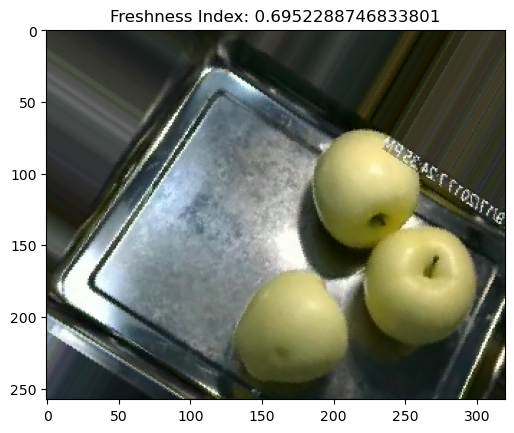

In [79]:
# Visualize the result
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Freshness Index: {freshness_index}')
plt.show()